# CE - 652
## Artificial Intelligence for Autonomous Driving
## Application Assigments 
##### Week: 2
##### Instructor: Dr. Juan D. Gomez
Related Videos: [The Adaline](https://youtu.be/-evFC-KzhWY) 

In [1]:
import numpy as np
import scipy.io.wavfile
import matplotlib.pyplot as plt


## Problem: 
There is a voice signal of a pilot affected by an turbine of the airplane (mixed.wav, have a listen!). We have access to the contaminated signal and the noisy signal of the turbine (noise.wav, have a listen!). An Adeline neural network has to be trained to filter the noise from the contaminated signal and recover the cleaned voice of the pilot (you have to provide this wav file, although I also attached my result as a reference for you, have a liste!). 


This Adaline has only one output (neuron) and 'n_inputs' inputs. The idea is to use this Adaline as a real time adaptive filter (the main application it is used for). Therefore, the noise signal will be the input of the Adaline although, to feed this signal ino the network, you will have to go across the signal (sample by sample) taking slices of size 'n_inputs'. We want our Adaline to respond to each sample of the noise input (or the slice that starts with such a sample) with the corresponding sample of the voice+noise signal (target T, e.i. mixed.wav). 

During some few first inputs, the Adaline will not be capable of responding as we wish, but soon (after some slices have been input) it will adapt and the response will resemble our target T (mixed.wav) more and more. Notice that since our output tends to T (and finally equals T), thus such output is not really the signal we are looking for (then which?). Also, since the Adaline is an adaptive filter you only have to input the whole noise signal once (the training lasts as long as there is T and Noise to train), because by the time the signal is reaching the end, the network has to be already well adapted (the cleaned voiced is already accessible). 


## Read the signals for this assigment:

In [2]:
# the turbine noise which we have access to
samplerate, P = scipy.io.wavfile.read('noise.WAV')

# our target 
samplerate, T = scipy.io.wavfile.read('mixed.WAV')

## Prepare the signals for this problem: 

In [3]:
# preprocessing the signals
T=  T-np.mean(T)
T= T/max(T)
P=  P-np.mean(P)
P= P/max(P)
# lenght of the training
l=len(T)
# Number of inputs of the network
n_inputs=3
# learning rate
alpha=0.01

## Initialize weights W and error E: 

In [4]:
# please use this instead of pure randomly
W=0.001*np.ones(n_inputs)
# initialize in 0
E=np.zeros(l)

## Train the network:

In [5]:
# Here your code    
#Thank you professor!
#This is much more efficient than what I previously had!
for i in range(n_inputs,l):
    E[i]=T[i-1] -  np.dot(W,np.transpose(P[i-n_inputs:i]))
    grad=2*E[i]*P[i-n_inputs:i]
    W=W+grad*alpha


## Save final signals:

In [6]:
# who is cleaned?
cleaned = E
cleaned=np.int16(cleaned/np.max(cleaned)*32767)
scipy.io.wavfile.write('cleaned.WAV', samplerate,cleaned)

## Print the final signals:

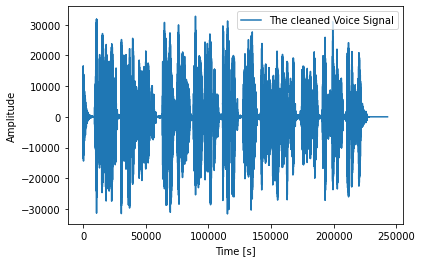

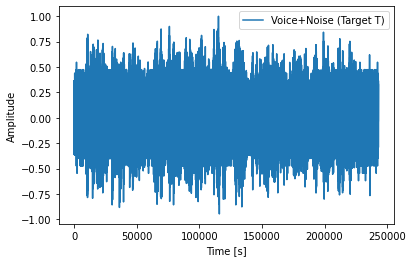

In [7]:
time = np.linspace(0., l, T.shape[0])

plt.plot(time, cleaned , label="The cleaned Voice Signal")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()



plt.plot(time, T, label="Voice+Noise (Target T)")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()